<a href="https://colab.research.google.com/github/Titashmkhrj/Quora-question-pair-similarity-detection/blob/master/modelling_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Description  
This is a problem from one of the competitions held on Kaggle.  
Competition name > <u>Quora Question Pairs</u>.  

What is Quora?  
Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.  

# Problem Description  
<i>(a/c the data source)</i>  
Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.  

# Objective  
<i>(a/c the data source)</i>   
The goal of this competition is to predict which of the provided pairs of questions contain two questions with the same meaning.  

# Data source  
* From **KAGGLE** - https://www.kaggle.com/c/quora-question-pairs

Okay so prime-facie let's import some of the libraries,  
we will import other libraries as we go on a need basis.

In [1]:
import sys

# library to handle vectorized data 
import numpy as np 
# library for data analsysis and man
import pandas as pd 
# so that the output is not trunacated by pandas when we actually want to see it 
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100000)

# for visualisations
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading the data.

In [2]:
train_data = pd.read_csv(r'/content/drive/My Drive/Projects/Quora_question_pair_similarity/train.csv')

In [3]:
print('The dimensions of the training data are {} rows and {} columns'.format(train_data.shape[0], train_data.shape[1]))

The dimensions of the training data are 404290 rows and 6 columns


In [4]:
# let's take a look at the data
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
# let's check the features in our data
train_data.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

Feature explanation according to the data source :  
* **id** - the id of a training set question pair
* **qid1**, **qid2** - unique ids of each question (only available in train.csv)
* **question1**, **question2** - the full text of each question
* **is_duplicate** - the target variable, set to 1 if question1 and question2 have essentially the same meaning, and 0 otherwise.

In [6]:
# let's also ckeck the data types of our features
train_data.dtypes

id               int64
qid1             int64
qid2             int64
question1       object
question2       object
is_duplicate     int64
dtype: object

# Exploratory data analysis and (if required) data cleaning.

### Frequency distribution of the labels in the target feature :   
**is_duplicate** is the target variable,  
set to **1** if <i>question1</i> and <i>question2</i> have essentially the same meaning,  
and set to **0** if <i>question1</i> and <i>question2</i> have otherwise different meaning.  

Okay so we can understand that it is  binary target feature;  
so let's check the frequency distribution of the labels.

>> Percentage of question pairs that are not similar = 63.08 %

>> Percentage of question pairs that are similar = 36.92 %


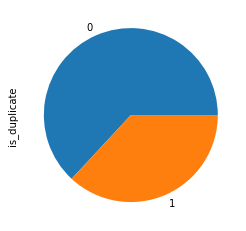

In [7]:
# plotting the frequency distribution
target_freq_dist = train_data['is_duplicate'].value_counts() 
target_freq_dist.plot.pie()
# printing the data related to it
print('''>> Percentage of question pairs that are not similar = {} %
\n>> Percentage of question pairs that are similar = {} %'''.format(round((target_freq_dist[0]/len(train_data))*100,2),
                                                               round((target_freq_dist[1]/len(train_data))*100, 2)))

okay so as we can from above that the frequency distribution of the labels in our targe feature is imbalanced.

### Unique questions :  
okay so now let us check the number of unique questions in our data, and how they are distributed.  

We have two features **qid1** and **qid2**, which contain the unique ids of the questons in our data. From observing the head of our dataset, prime - facie we can understand that the question pairs are made out of consecutive questions; i.e. questoin (1,2), (3,4), (5,6), and so on... From the above pattern we can infer that the pairs consist of consecutive odd and even numbered questions.  

okay, so assuming that given a particular question id there is only one question, let us see how many unique questions we have in our dataset.  

We will also be checking the frequency distribution of the unique questions in our dataset, i.e. assuming for a particular question id there is only one question, if that question is repeated in any other pair, and if so what is the frequency of such repetitions in our data.

In [69]:
# checking the number of unique questions, assuing that gven a particular question id there is only one question
question_ids = pd.Series(train_data['qid1'].tolist() + train_data['qid2'].tolist())
print('The number of unique questions in our dataset are ', len(np.unique(question_ids)), ' questions.')

The number of unique questions in our dataset are  537933  questions.


In [86]:
# checking the frequency of repetition of each unique question
freq_dict = {'no_of_questions' : ((question_ids.value_counts()).value_counts()).values,
             'frequency_of_repitition' : ((question_ids.value_counts()).value_counts()).index
}

freq_of_questions = pd.DataFrame(freq_dict)
freq_of_questions

,no_of_questions,frequency_of_repitition
0,426153,1
1,64767,2
2,21226,3
3,9345,4
4,4865,5
5,2846,6
6,1842,7
7,1308,8
8,929,9
9,693,10


Observations : 
* 426153 number of questions have no repetitions in our dataset, which means 111780 questions have repetitions in our dataset.
* The frequncy distribution of repetitions of questions range from 1 to 157.
* The frequency of repetition of questions is inversly proportionate to the number od questions repeated for that particular frequency.
